In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
df_results = pd.read_csv("results.csv", sep=";")
df_results

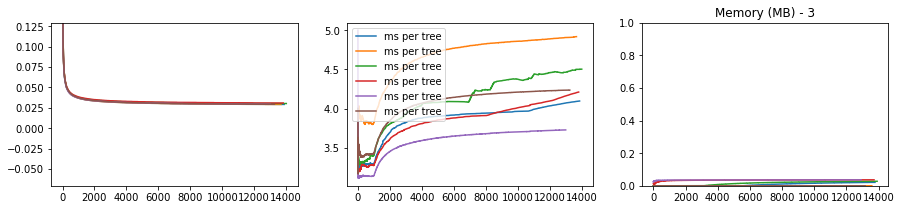

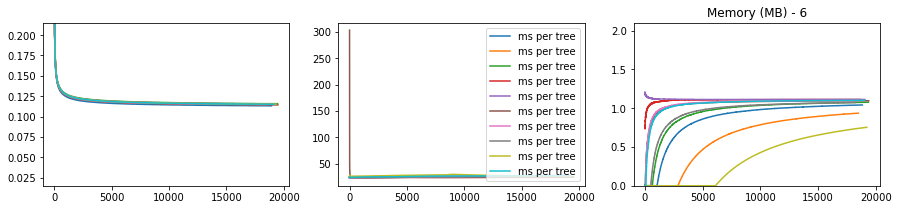

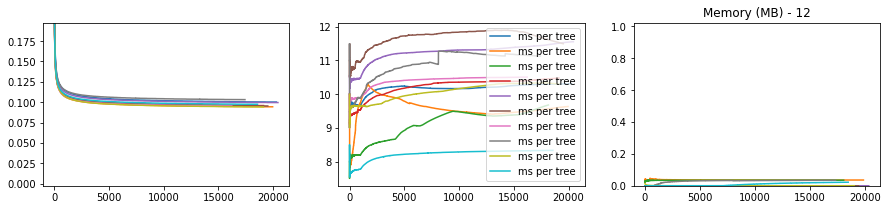

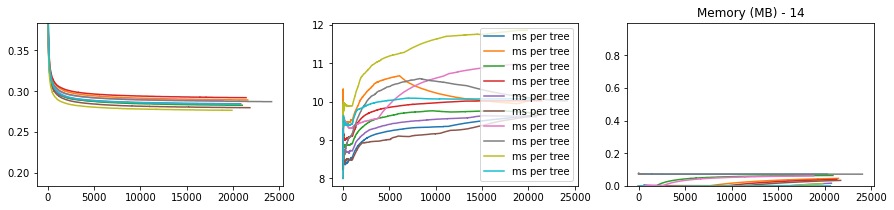

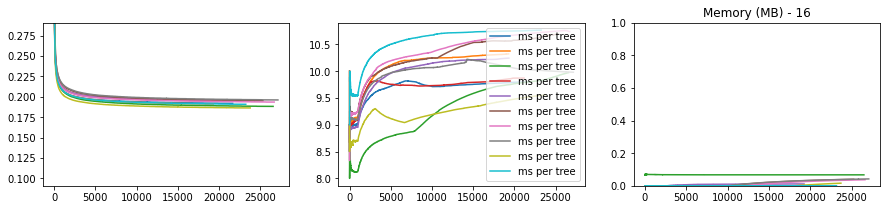

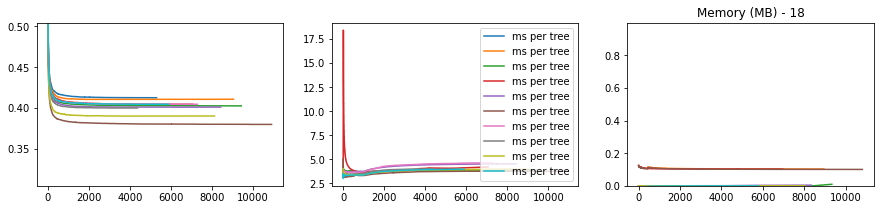

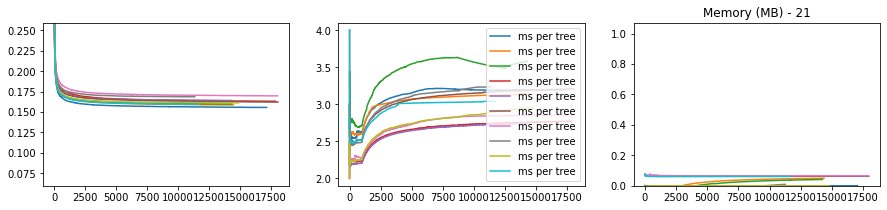

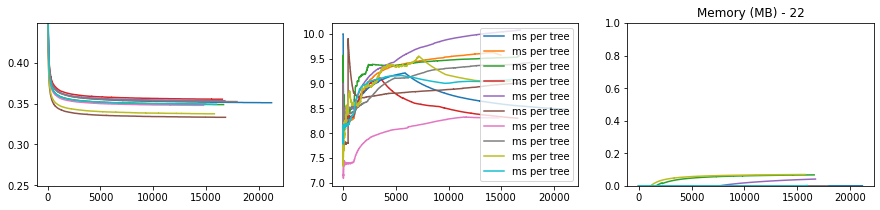

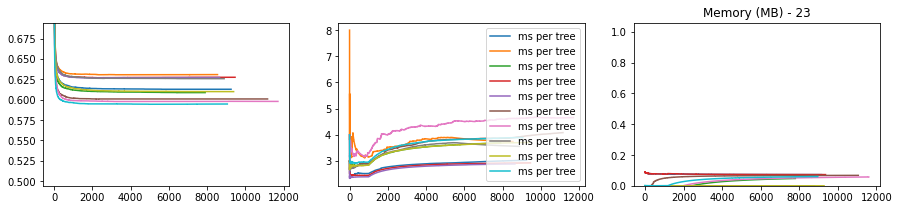

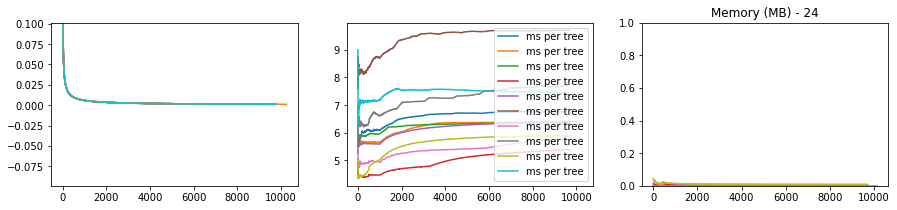

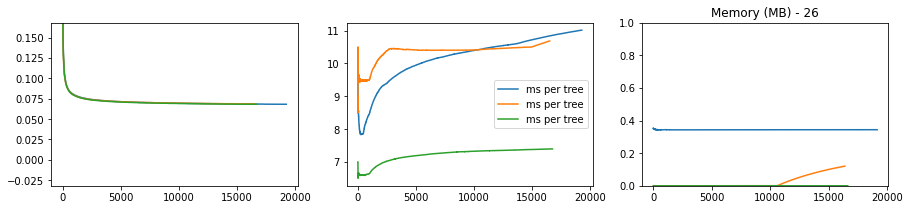

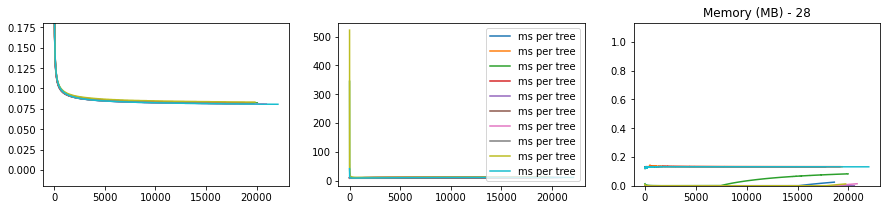

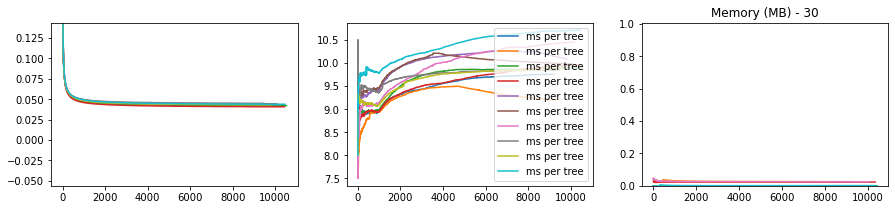

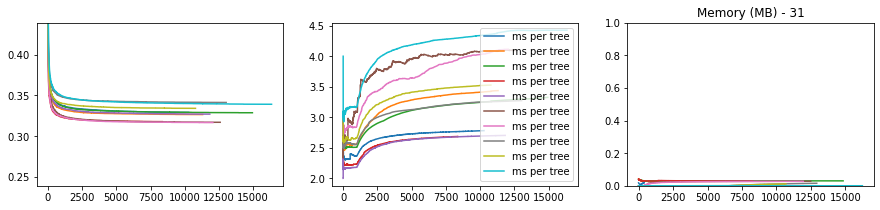

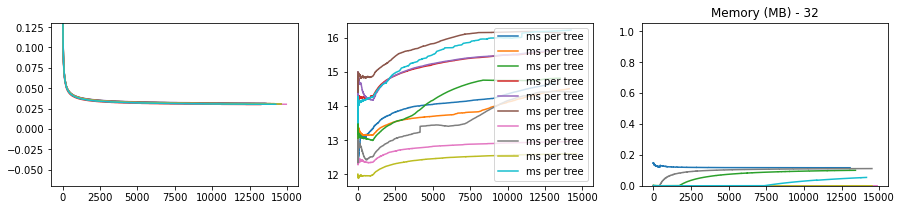

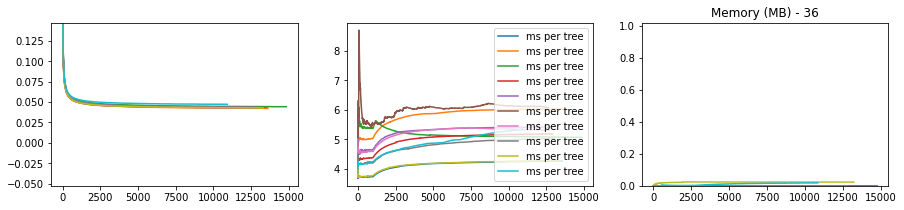

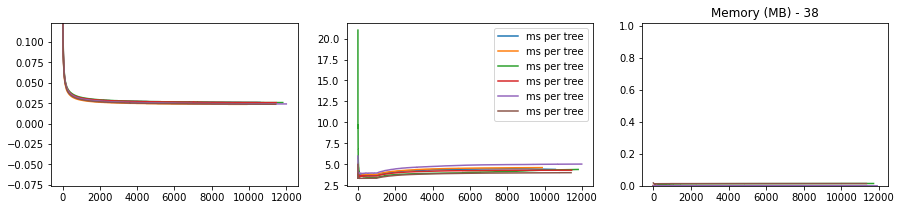

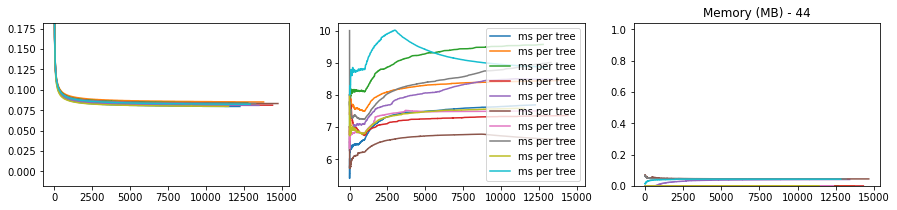

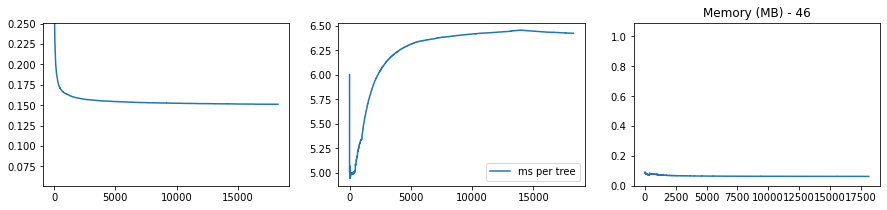

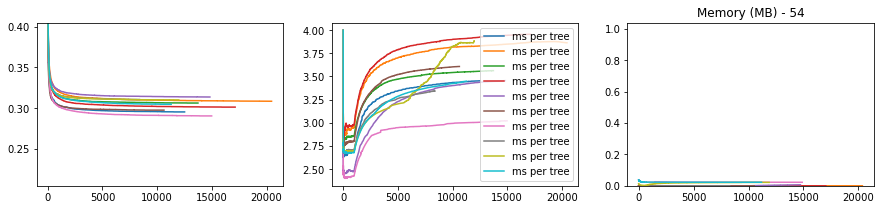

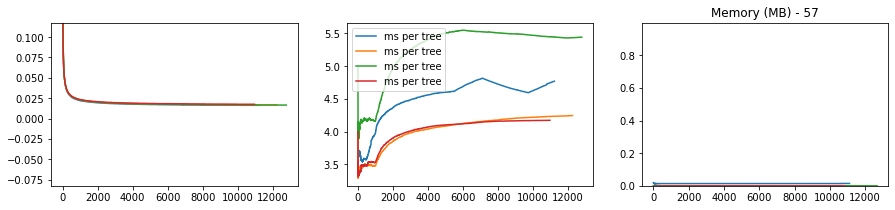

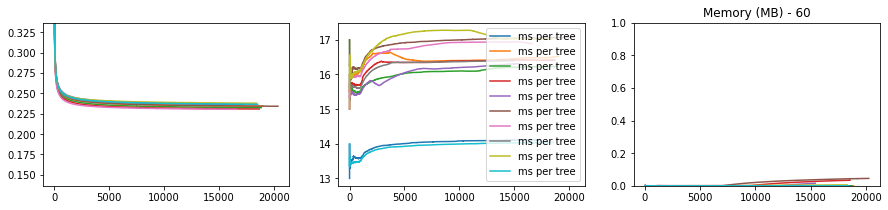

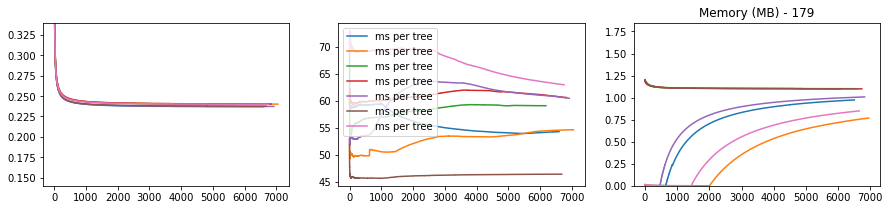

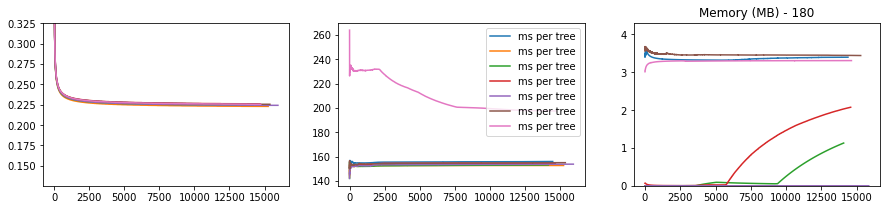

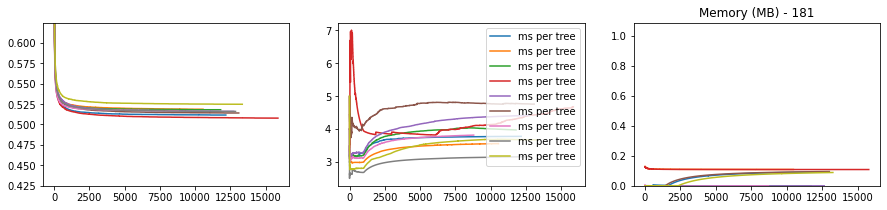

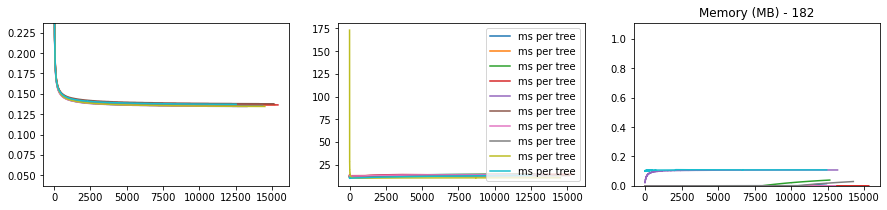

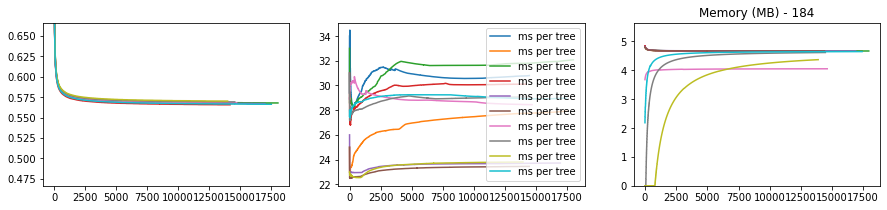

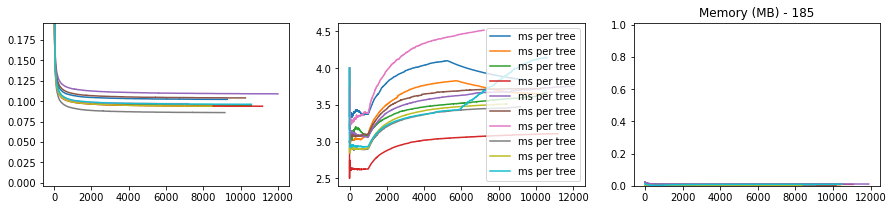

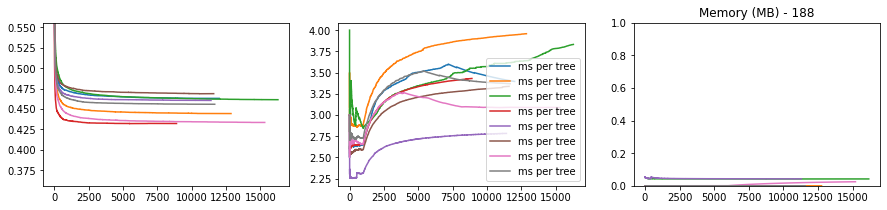

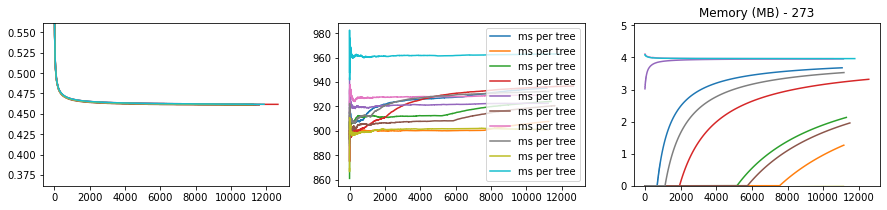

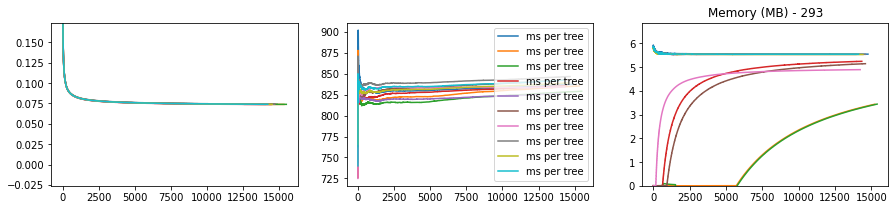

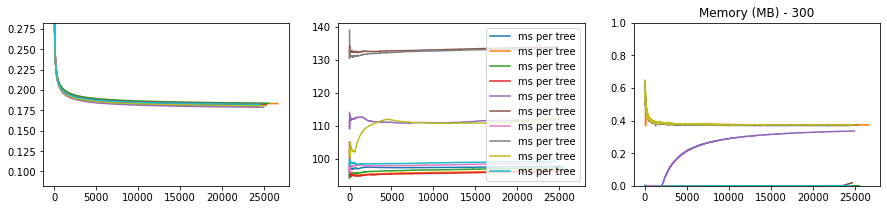

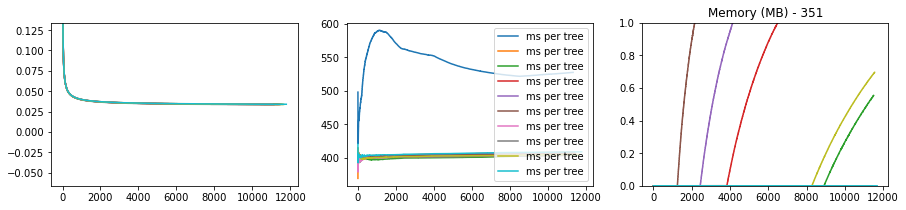

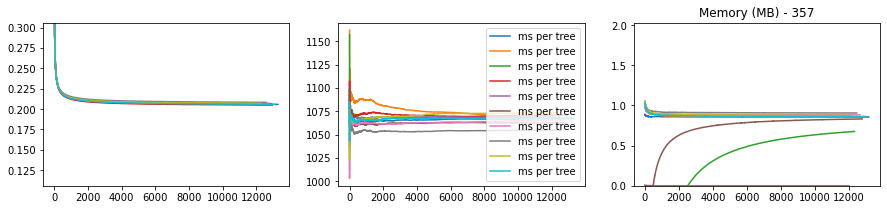

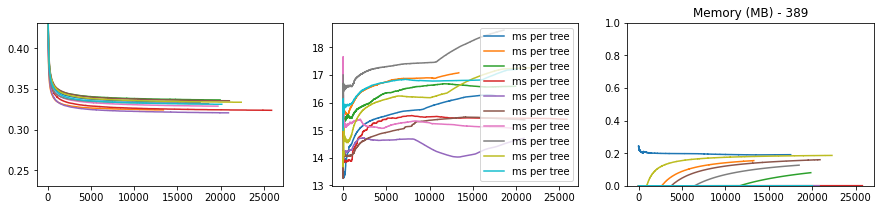

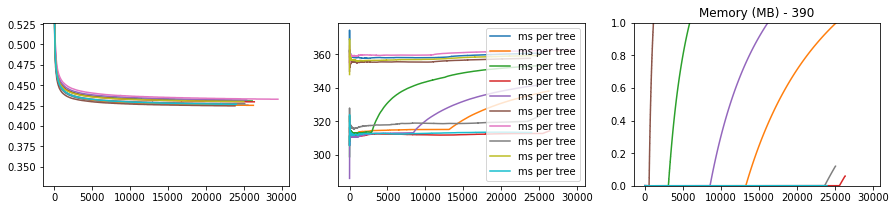

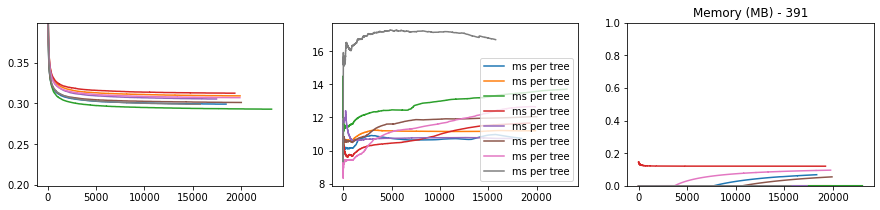

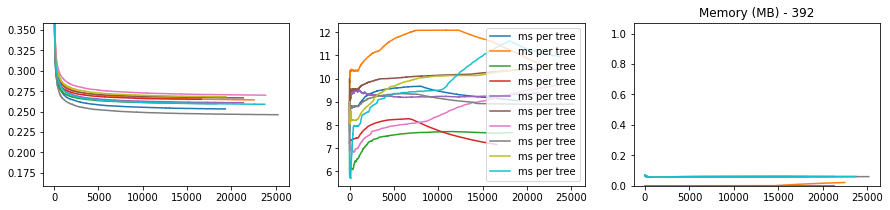

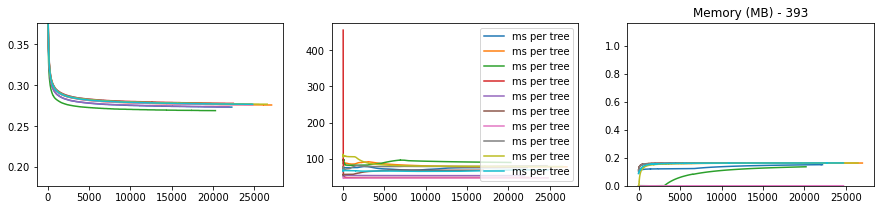

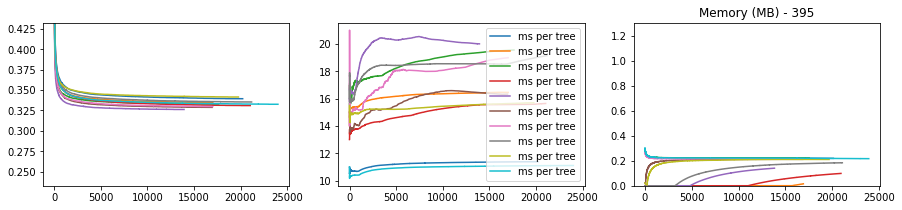

/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


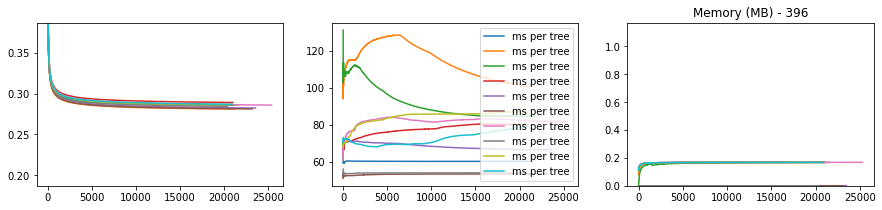

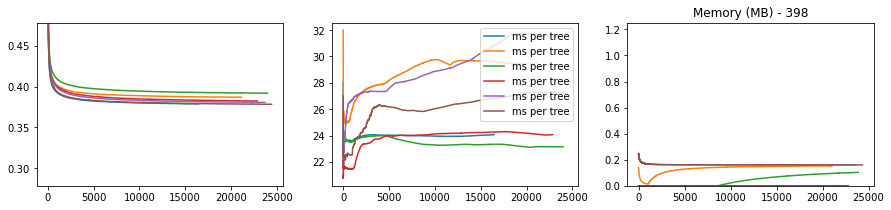

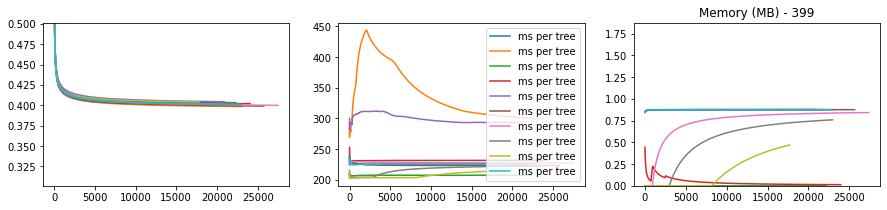

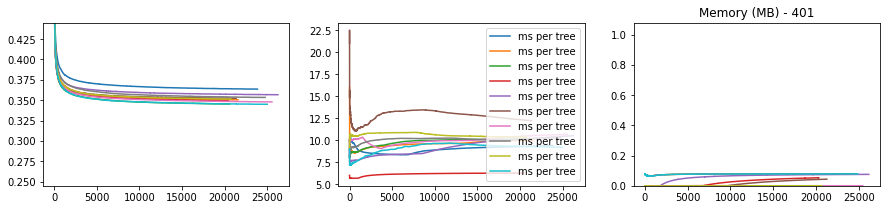

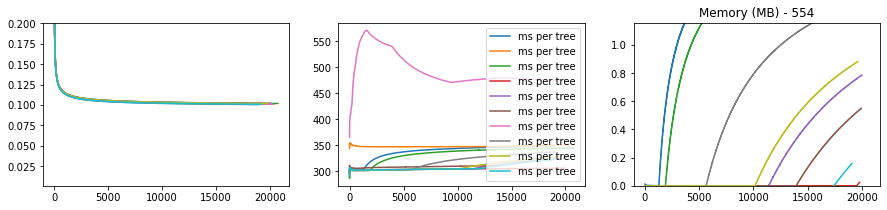

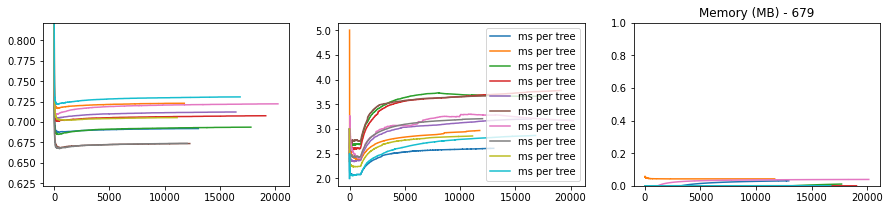

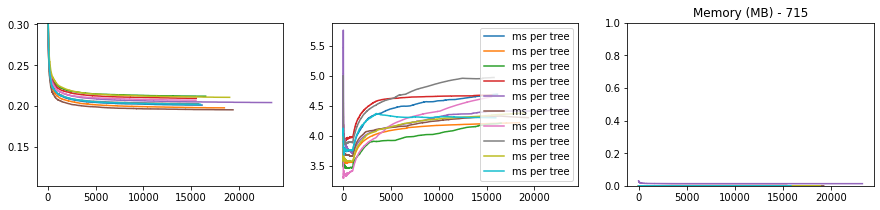

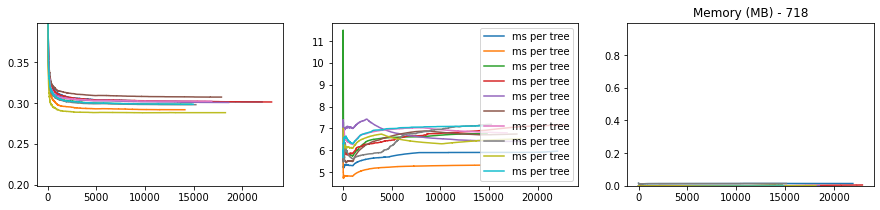

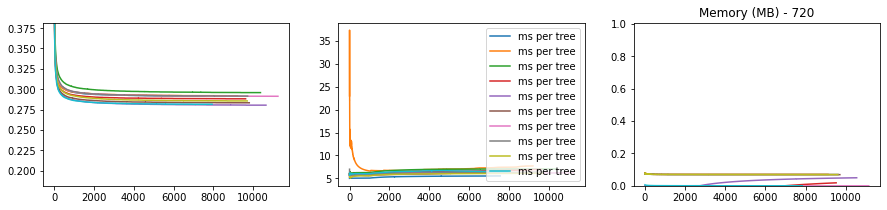

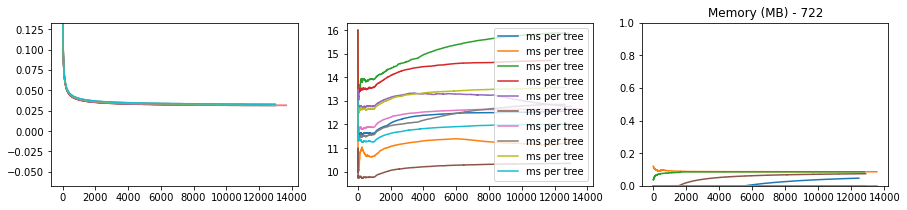

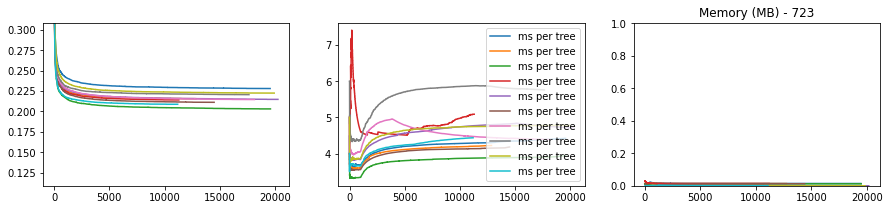

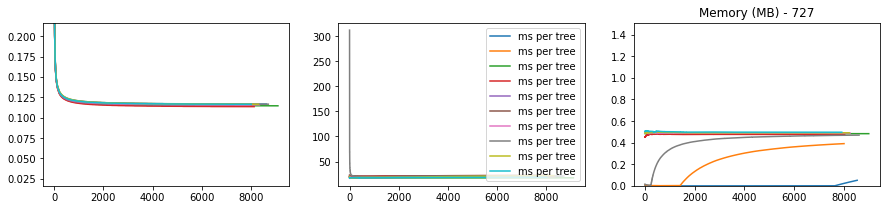

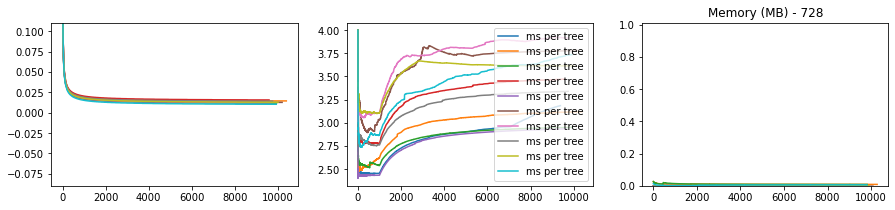

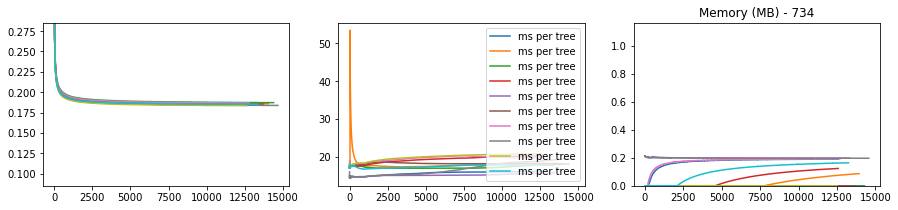

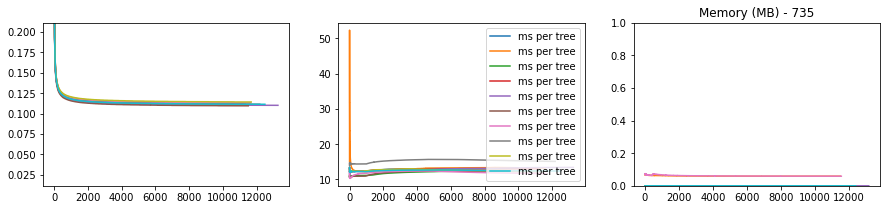

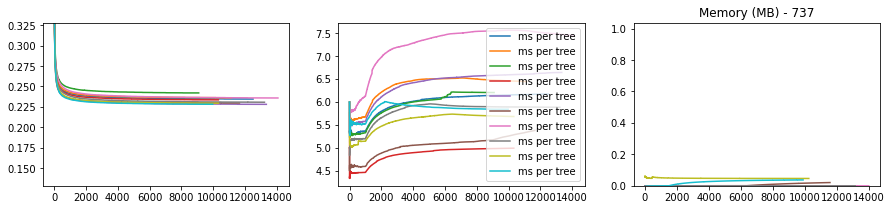

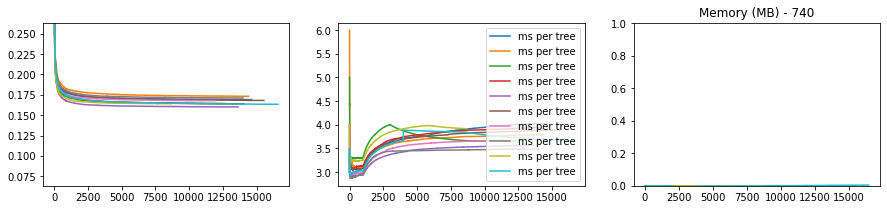

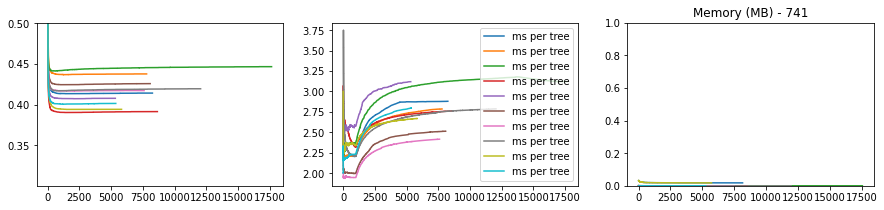

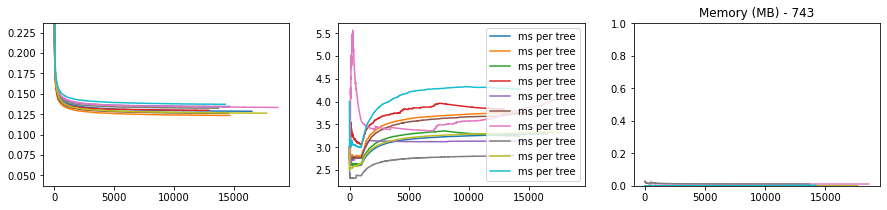

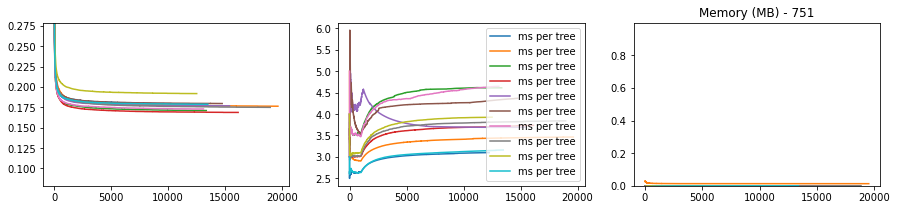

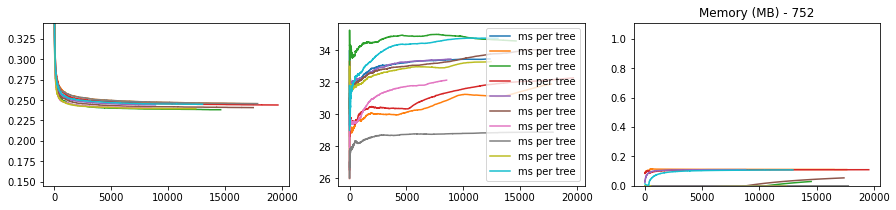

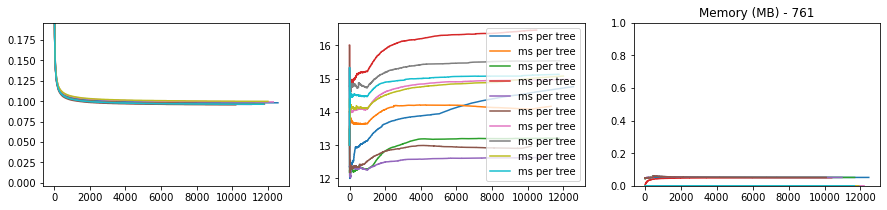

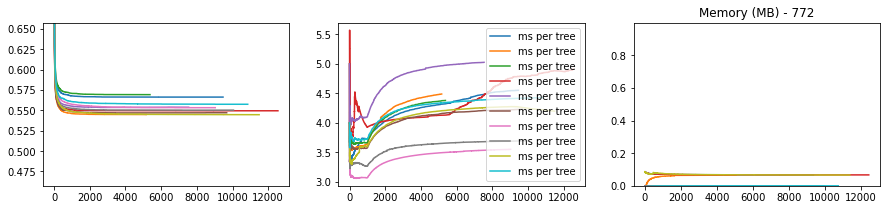

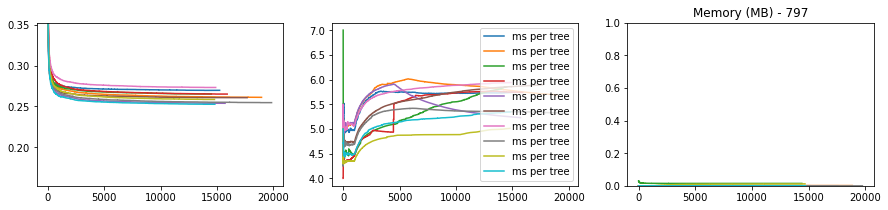

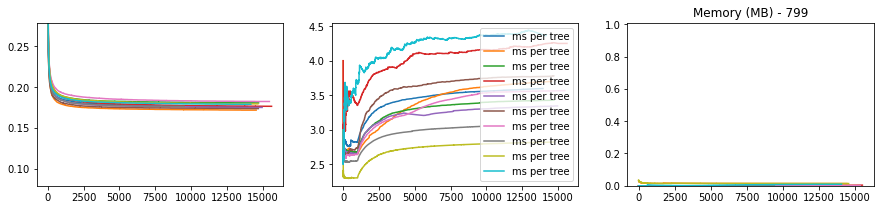

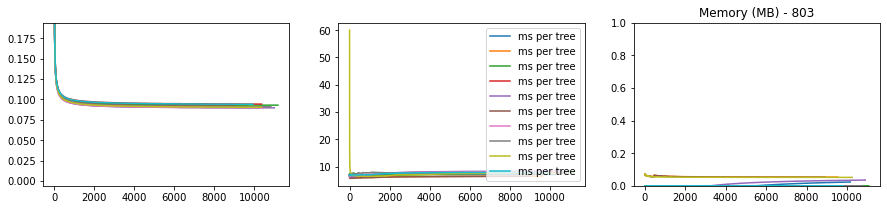

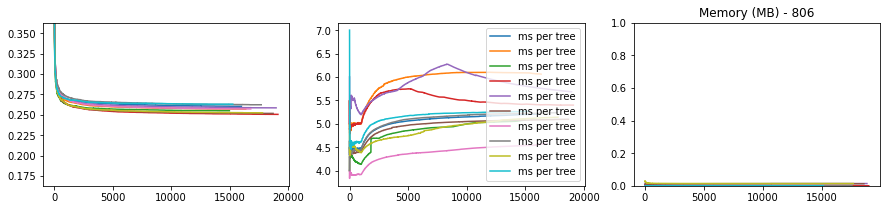

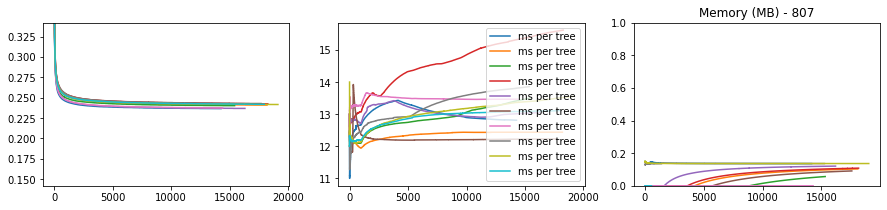

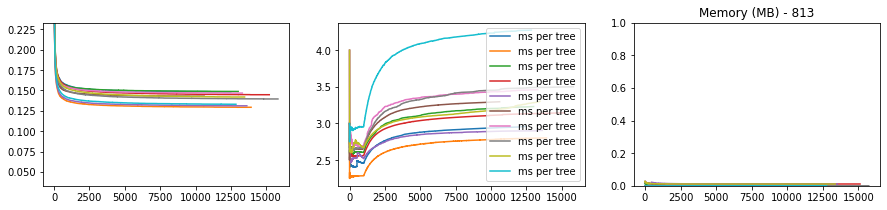

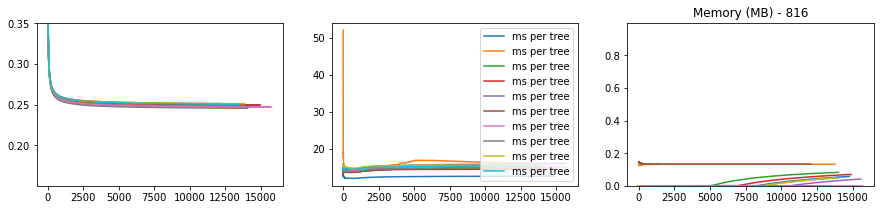

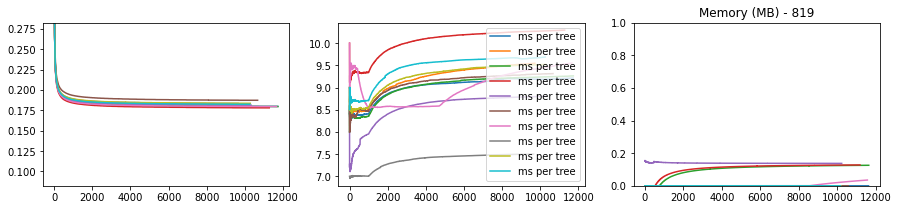

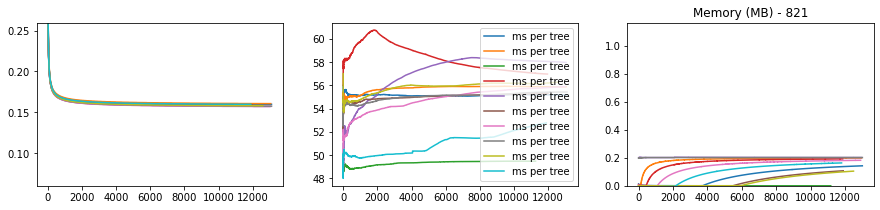

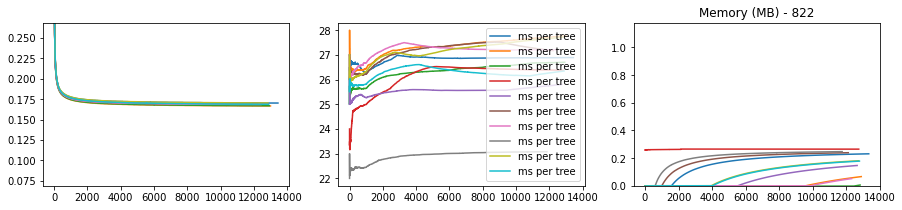

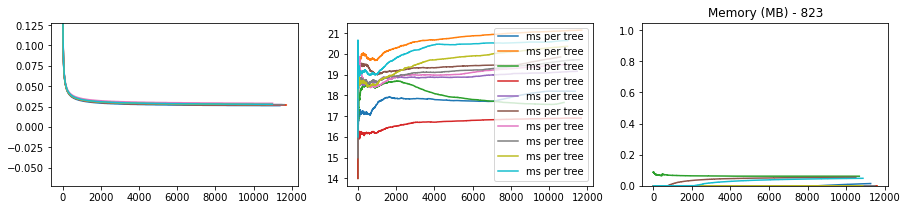

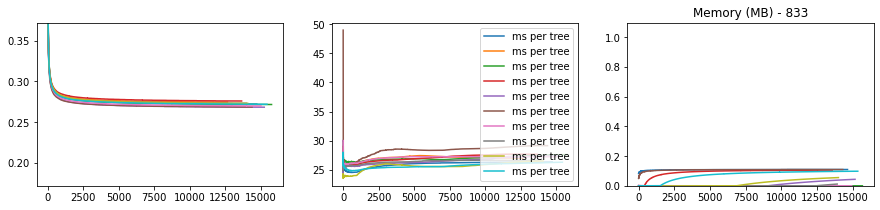

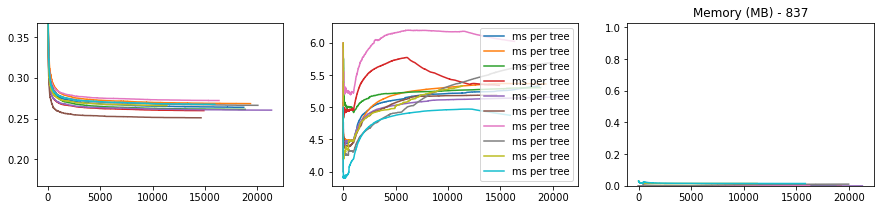

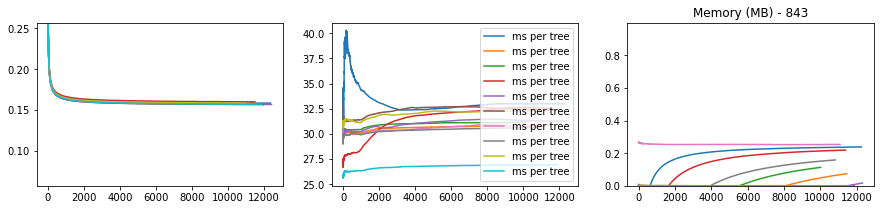

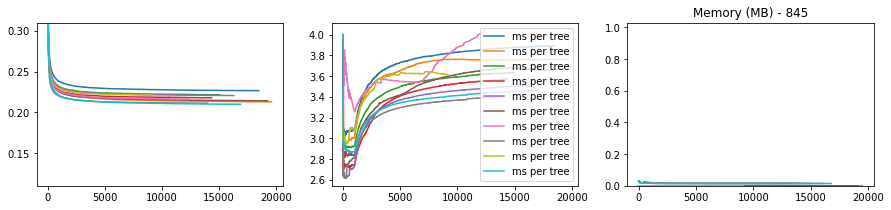

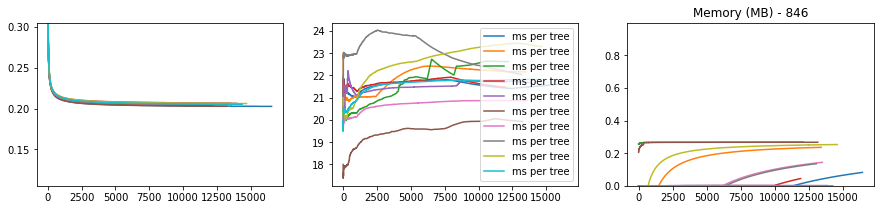

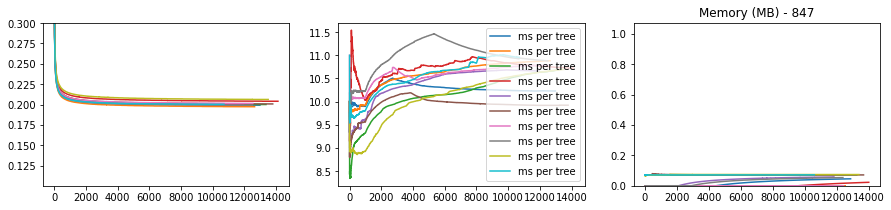

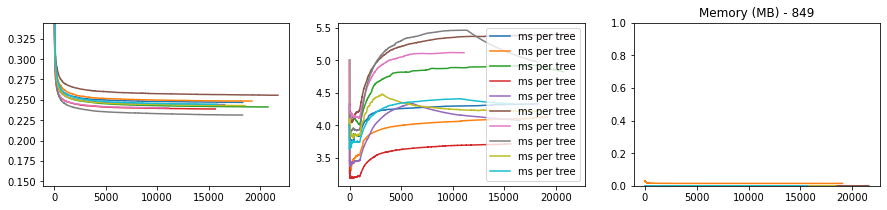

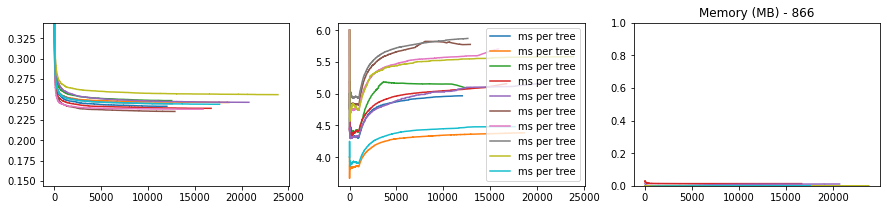

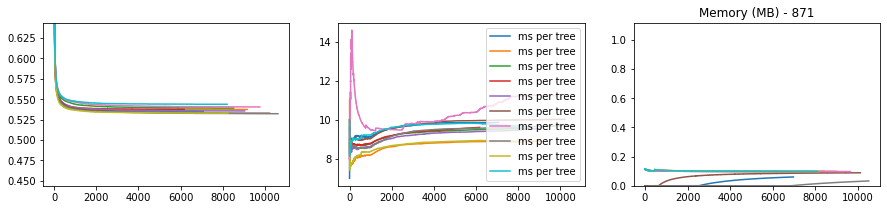

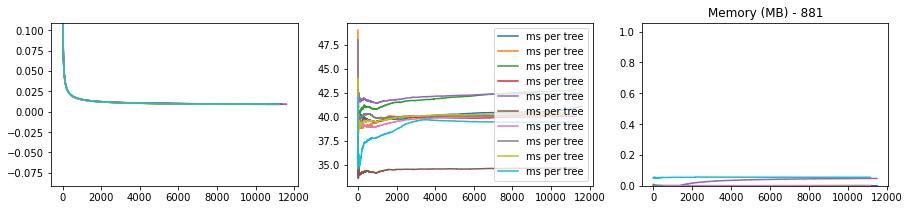

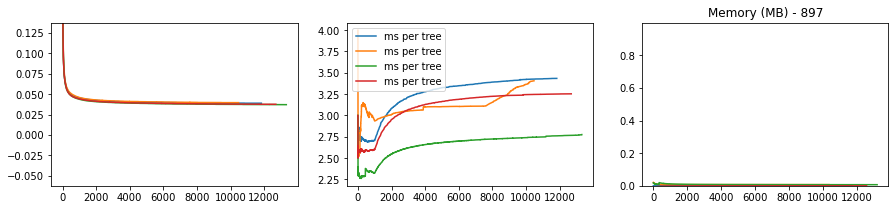

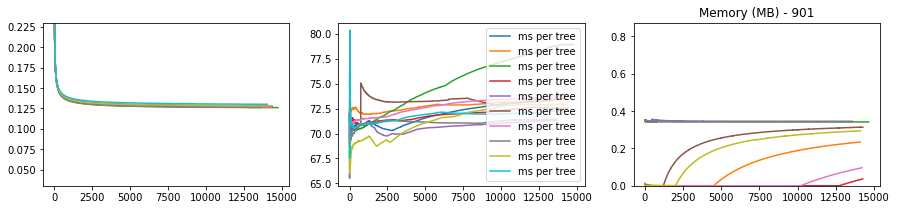

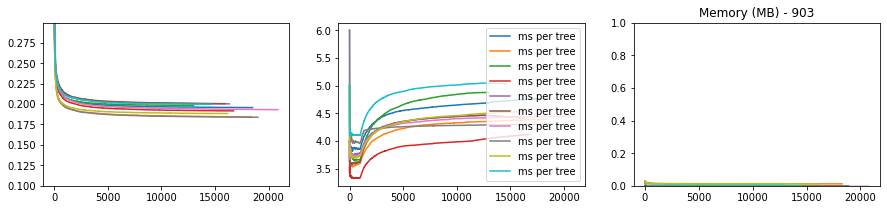

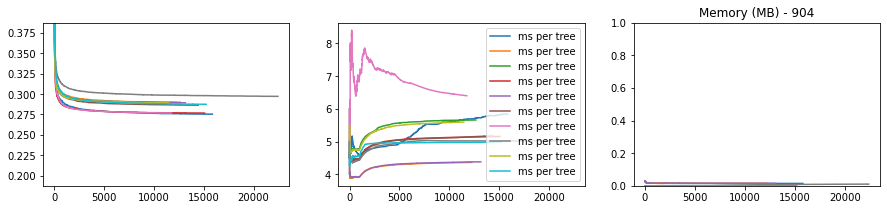

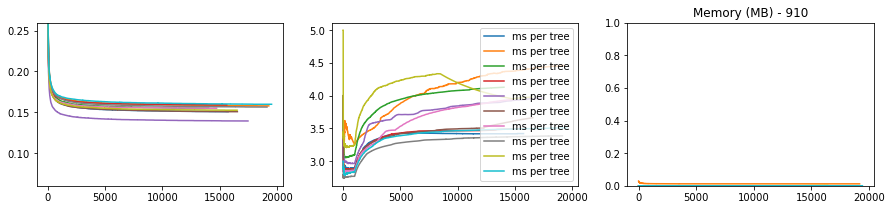

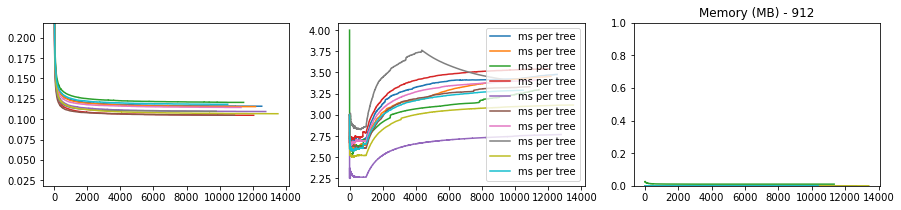

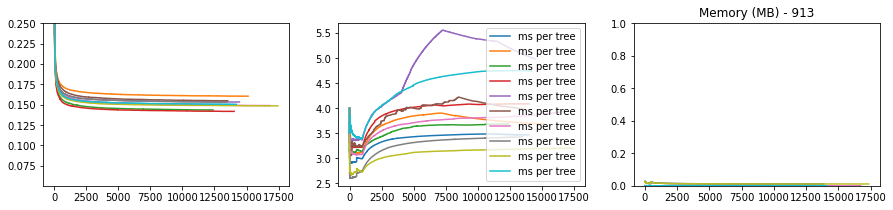

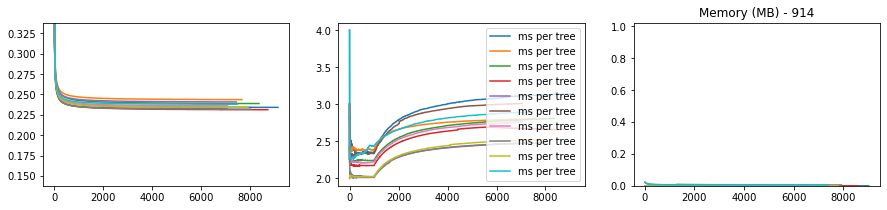

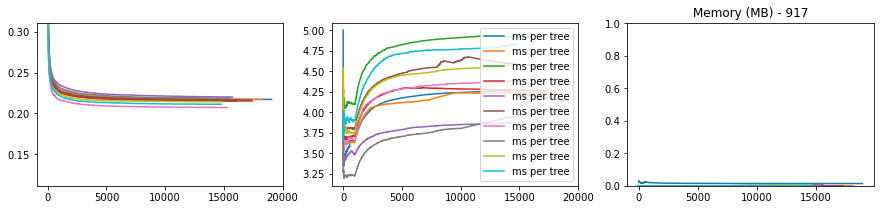

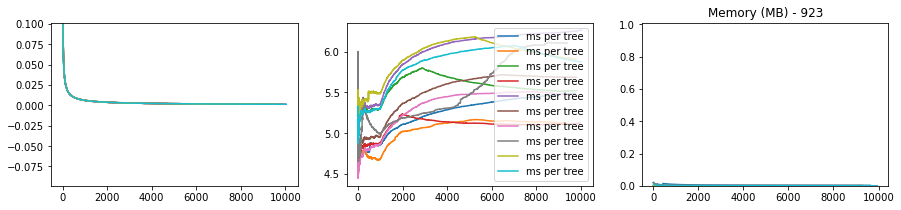

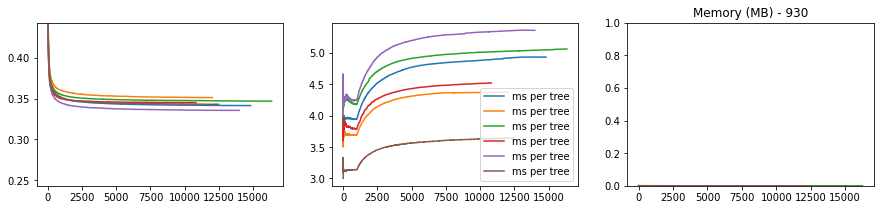

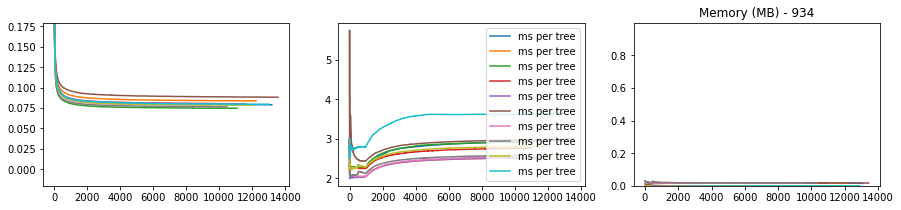

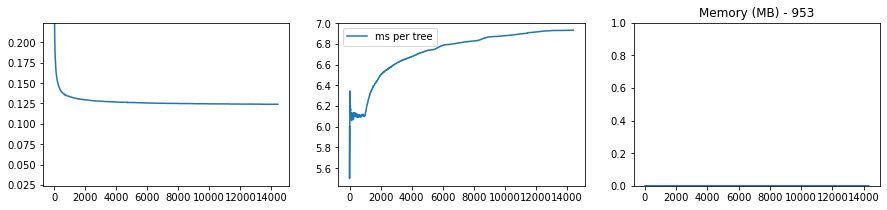

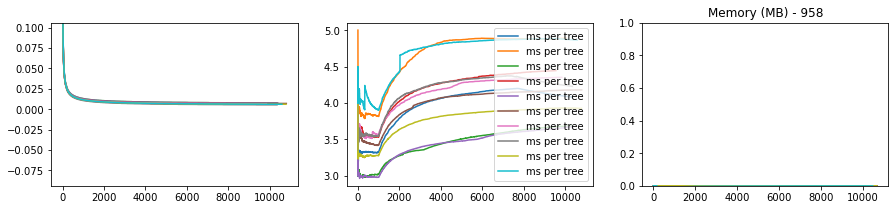

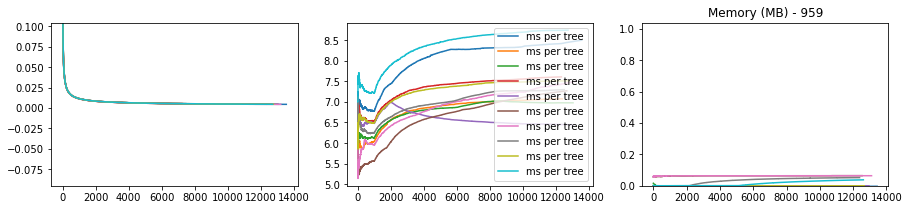

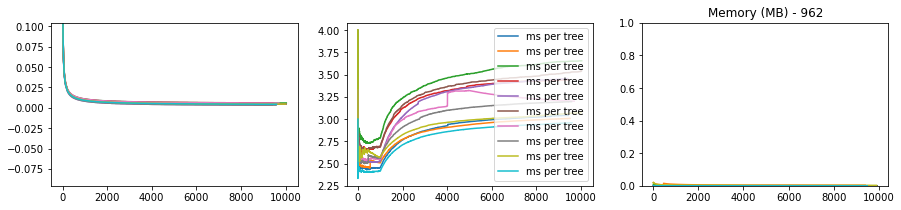

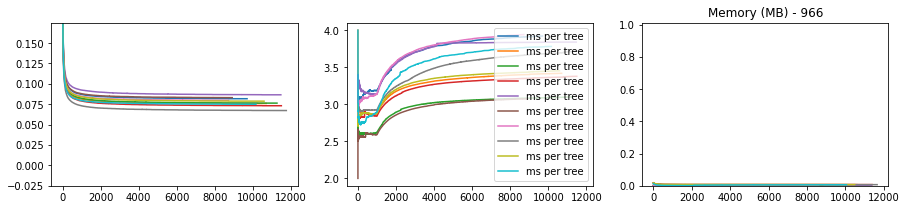

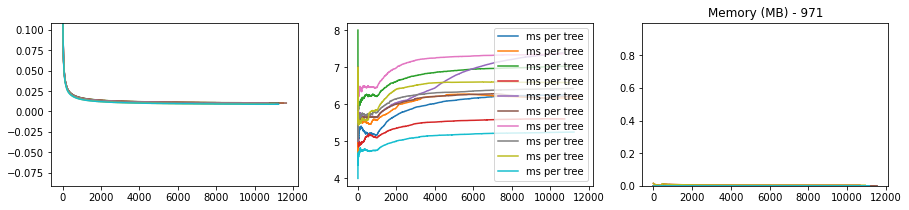

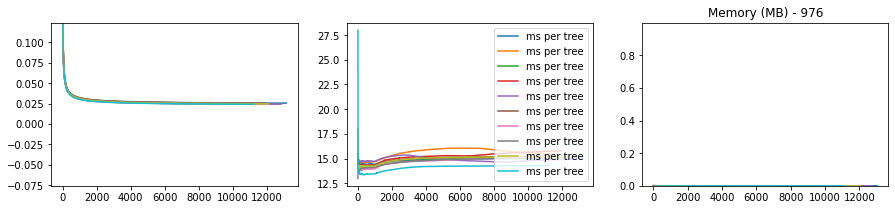

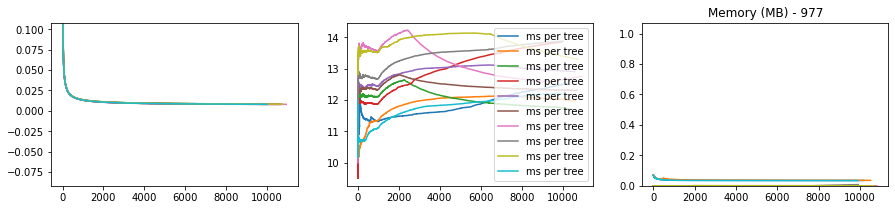

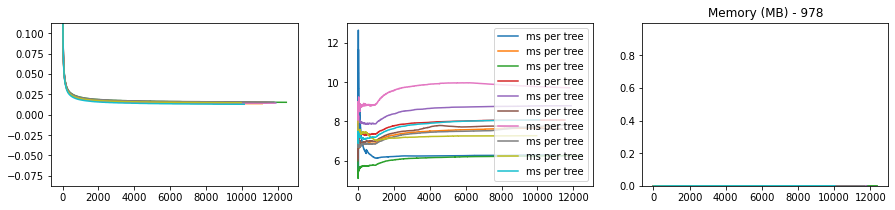

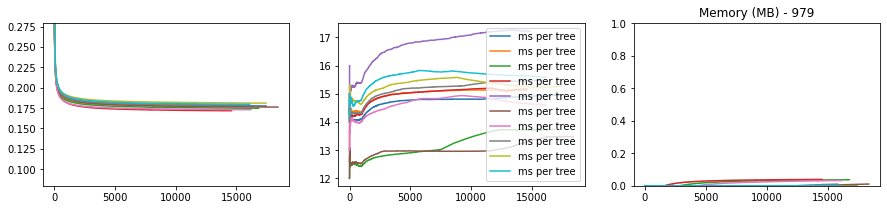

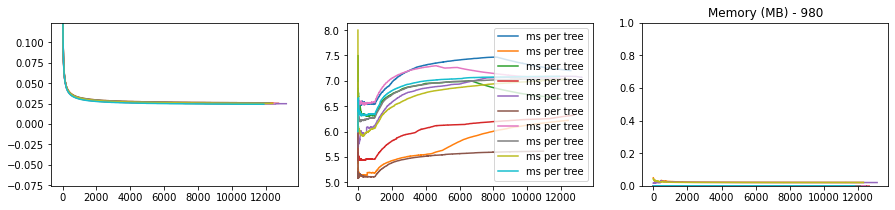

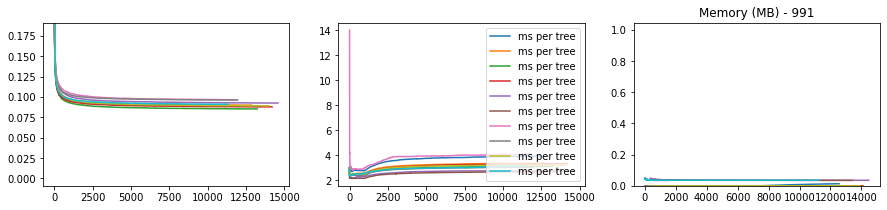

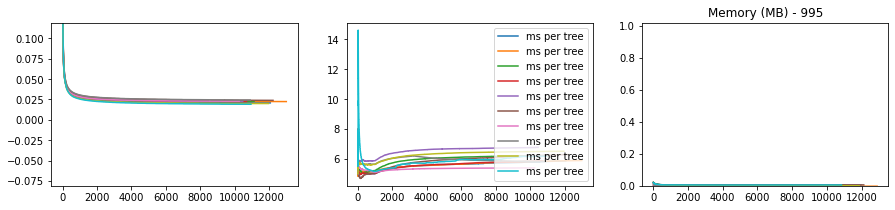

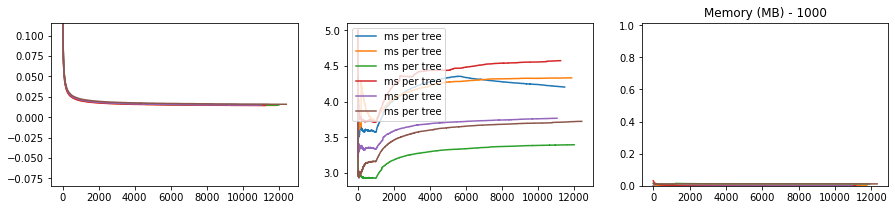

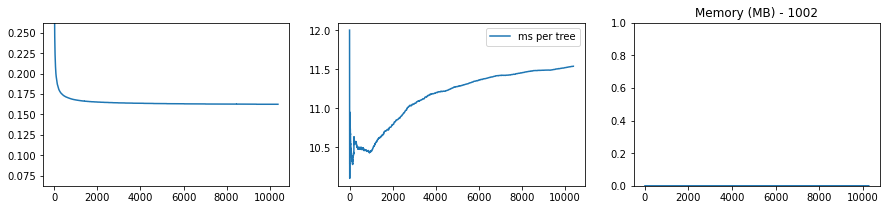

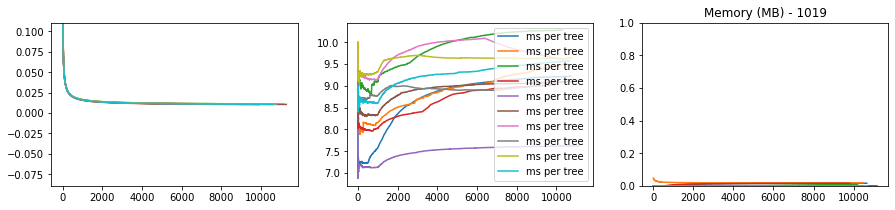

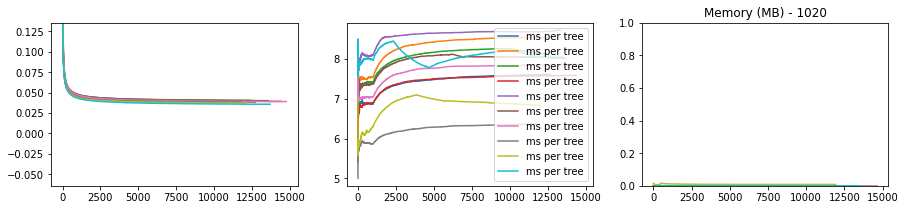

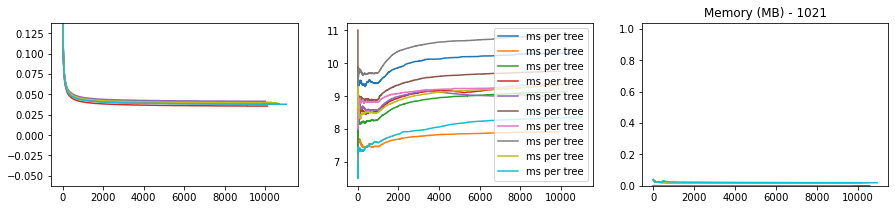

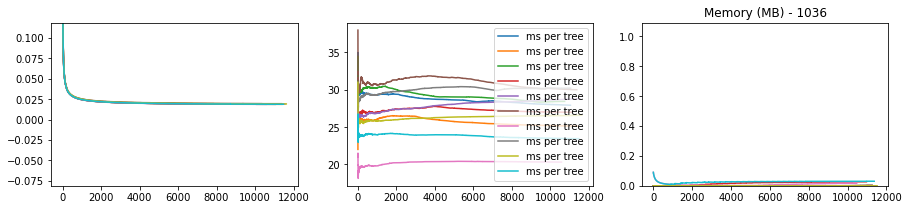

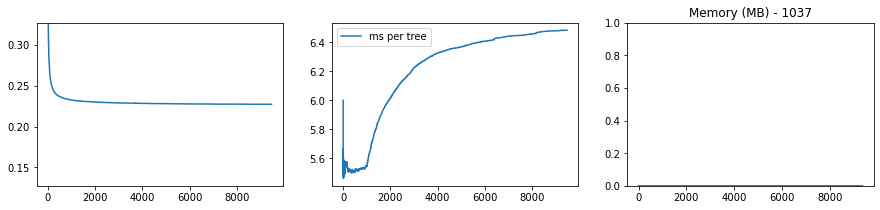

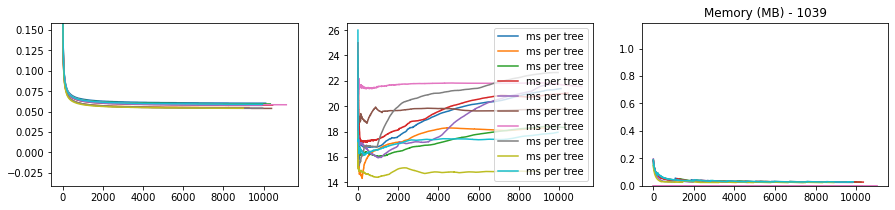

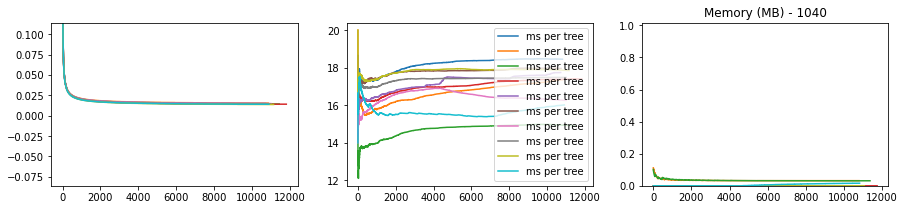

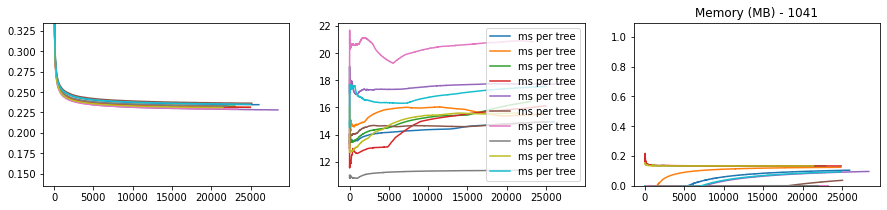

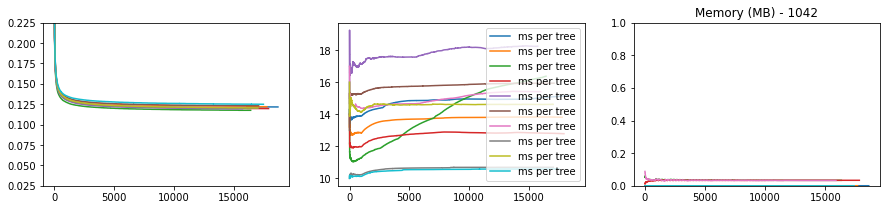

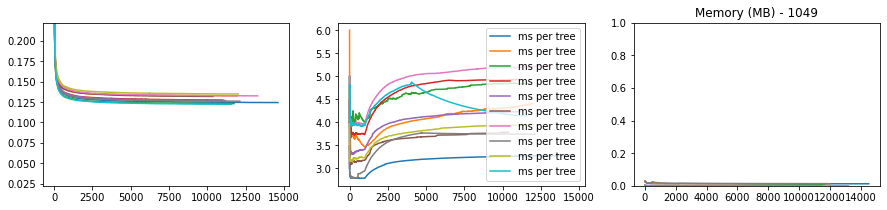

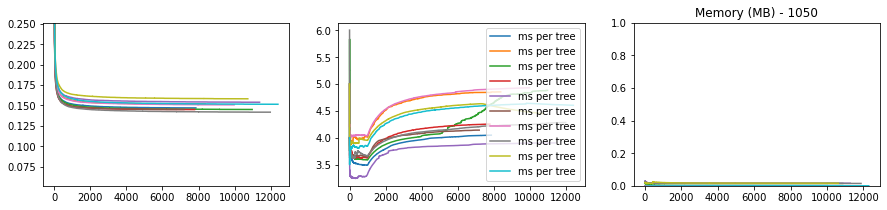

KeyboardInterrupt: 

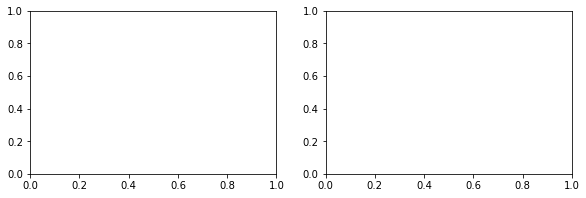

In [26]:
for openmlid, df_dataset in df_results.groupby("openmlid"):
    fig, axs = plt.subplots(1, 3, figsize=(15,3))
    for l in df_dataset["scores"].values:
        history = json.loads(l)
        times = [t[0] for t in history]
        
        ax = axs[0]
        scores_train= [t[3] for t in history]
        scores_test= [t[4] for t in history]
        
        ax.plot(range(len(times)), scores_train)
        #ax.plot(range(len(times)), scores_test)
        final_score = min(scores_train)
        ax.set_ylim([final_score - 0.1, final_score + 0.1])
        #ax.axhline(final_score - 0.01, linestyle="--", color="black", linewidth=1)
        #ax.axhline(final_score + 0.01, linestyle="--", color="black", linewidth=1)
        
        ax = axs[1]
        relative_times = [(times[t] - times[0]) / t for t in range(1, len(times))]
        ax.step(range(len(relative_times)), relative_times, label="ms per tree")
        ax.legend()
        
        ax = axs[2]
        offset = 100
        memory = [t[5] / i for i, t in enumerate(history[offset - 1:], start=offset)]
        ax.step(range(len(memory)), memory)
        ax.set_title(f"Memory (MB) - {openmlid}")
        ax.set_ylim([0, max(memory) + 1])
        
    plt.show()